# Capstone Project AQI to the Death (Sprint 3)
#### Nattawaree Piyarat

## Problem statement
Can machine learning accurately indicate heathly based on the Air Quality Index (AQI)?
Are there correlations between air quality and health outcomes, particularly mortality rates, and air pollution stems from various sources such as wildfires, dust, vehicular emissions, and industrial activities?

#### Goal for Sprint 3
- Visualization
- EDA insight
- Model optimization, evaluation, and interpretation.



## Dataset
1. Air Quality Index (2009–2019):

- Initially sourced from WHO.
- This dataset has been removed and replaced with another due to the inclusion of more pollutants, while retaining similar details.
2. Number of Deaths by Cause (2016–2019):

- Sourced from WHO.
3. Air Quality Open Data Platform (2019–2020):

- Sourced from The World Air Quality Index Project.
- The data includes city-specific measurements, aggregated to calculate the mean air quality for each country on each date for this project.



### Steps
### Step 1. Exploratory Data Analysis
Describe and pre-processing data
- Shape
- Fill N/A data
- Remove duplicate rows
- Convert data and add necessary aggregate columns

### Step 2. Modelling
For this project I choose 4 models
1. Linear Regression
2. Logistic Regression
3. KNN
4. Decision Tree

### Step 3. Model Comparison


---

## Step 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## TODO - DTALE - DATA Visulization library

# stats
# from statsmodels.api import tsa # time series analysis
from scipy import stats
from scipy.stats import norm #used for plotting

In [2]:
# Read data of "Air quality open data platform year 2019 - 2023 from The World Air Quality Index Project"
df = pd.read_csv('Data/2016_3aqi.csv')

In [3]:
df.head()

,Date,Country,iso3,aqi,co,no2,o3,pm10,pm25,so2
0,2015-12-28,China,CHN,153.333333,13.276923,20.359615,12.394118,77.365385,139.173077,16.957692
1,2015-12-28,India,IND,NaN,17.800000,10.450000,20.366667,127.000000,190.000000,5.500000
2,2015-12-28,Thailand,THA,NaN,9.420000,12.280000,18.400000,47.200000,NaN,6.900000
3,2015-12-29,China,CHN,273.666667,15.434615,24.209615,11.611765,95.192308,168.192308,18.317308
4,2015-12-29,India,IND,NaN,7.840000,12.525000,14.233333,127.000000,201.875000,5.560000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3675 non-null   object 
 1   Country  3675 non-null   object 
 2   iso3     3675 non-null   object 
 3   aqi      925 non-null    float64
 4   co       3675 non-null   float64
 5   no2      3675 non-null   float64
 6   o3       3674 non-null   float64
 7   pm10     3674 non-null   float64
 8   pm25     3667 non-null   float64
 9   so2      3674 non-null   float64
dtypes: float64(7), object(3)
memory usage: 287.2+ KB


In [5]:
df.describe()

,aqi,co,no2,o3,pm10,pm25,so2
count,925.000000,3675.000000,3675.000000,3674.000000,3674.000000,3667.000000,3674.000000
mean,90.437387,5.379977,11.245260,16.940225,57.127570,101.422452,4.462196
std,50.788645,3.736787,5.316479,9.380021,27.125544,39.955062,3.682360
min,0.000000,0.100000,2.400000,3.600000,13.800000,22.000000,0.633333
25%,60.000000,0.100000,7.166667,9.910132,37.250000,70.583194,1.540714
50%,83.333333,6.178846,10.355769,13.924747,51.990385,97.961538,4.015192
75%,111.750000,7.845192,14.457143,22.997826,72.102564,128.776961,5.797596
max,351.500000,21.486538,48.222222,56.012500,216.142857,245.300000,125.950000


### Data
1. Shape is 3675 x 10
2. All columns show mean and max so far which mean there are some outliers.
3. Some null value
    - Fill aqi by 0 (not use)
    - Fill other values by mean of each country

In [6]:
# check null value percentage
df.isna().mean()*100

Date        0.000000
Country     0.000000
iso3        0.000000
aqi        74.829932
co          0.000000
no2         0.000000
o3          0.027211
pm10        0.027211
pm25        0.217687
so2         0.027211
dtype: float64

In [7]:
# Fill aqi by 0 (not use)
# Fill other values by mean of each country

df[['aqi']] = df[['aqi']].fillna(value=0)
df['o3'] = df['o3'].fillna(df.groupby('Country')['o3'].transform('mean'))
df['pm10'] = df['pm10'].fillna(df.groupby('Country')['pm10'].transform('mean'))
df['pm25'] = df['pm25'].fillna(df.groupby('Country')['pm25'].transform('mean'))
df['so2'] = df['so2'].fillna(df.groupby('Country')['so2'].transform('mean'))


In [8]:
# check null value percentage
df.isna().mean()*100

Date       0.0
Country    0.0
iso3       0.0
aqi        0.0
co         0.0
no2        0.0
o3         0.0
pm10       0.0
pm25       0.0
so2        0.0
dtype: float64

In [9]:
# remove duplicate
df = df.drop_duplicates()

In [10]:
df.duplicated().mean()*100

0.0

In [11]:
# Change date datatype from object to date
df.Date = pd.to_datetime(df.Date)

In [12]:
df['year'] = df['Date'].dt.year

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3649 entries, 0 to 3674
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3649 non-null   datetime64[ns]
 1   Country  3649 non-null   object        
 2   iso3     3649 non-null   object        
 3   aqi      3649 non-null   float64       
 4   co       3649 non-null   float64       
 5   no2      3649 non-null   float64       
 6   o3       3649 non-null   float64       
 7   pm10     3649 non-null   float64       
 8   pm25     3649 non-null   float64       
 9   so2      3649 non-null   float64       
 10  year     3649 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(2)
memory usage: 327.8+ KB


### Visualize data

<Figure size 640x480 with 0 Axes>

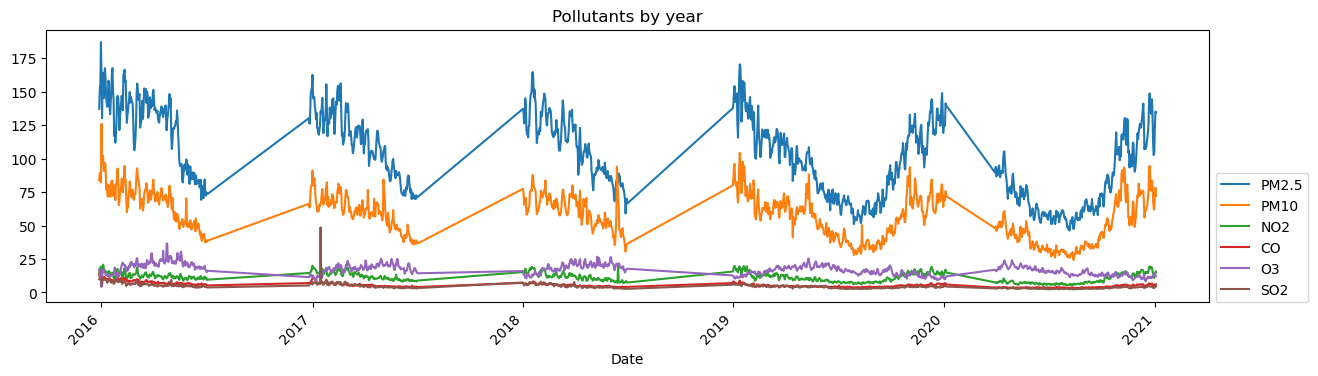

In [14]:
plt.figure()
plt.subplots(figsize=(15, 4))
df.groupby(df.Date)['pm25'].mean().plot(kind='line',label='PM2.5')
df.groupby(df.Date)['pm10'].mean().plot(kind='line', label='PM10')
df.groupby(df.Date)['no2'].mean().plot(kind='line', label='NO2')
df.groupby(df.Date)['co'].mean().plot(kind='line', label='CO')
df.groupby(df.Date)['o3'].mean().plot(kind='line', label='O3')
df.groupby(df.Date)['so2'].mean().plot(kind='line', label='SO2')
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5))
plt.title('Pollutants by year')
plt.xticks(rotation=45)
plt.show()

>**Finding**
From 2016 to 2018, data is available only for the first half of each year, showing a peak in January and a subsequent increase through the mid-year. For 2019 to 2021 Q1, the full-year data follows a similar trend: a peak in January, a gradual decline until mid-year, and then a climb back up until the next January peak.

<Figure size 640x480 with 0 Axes>

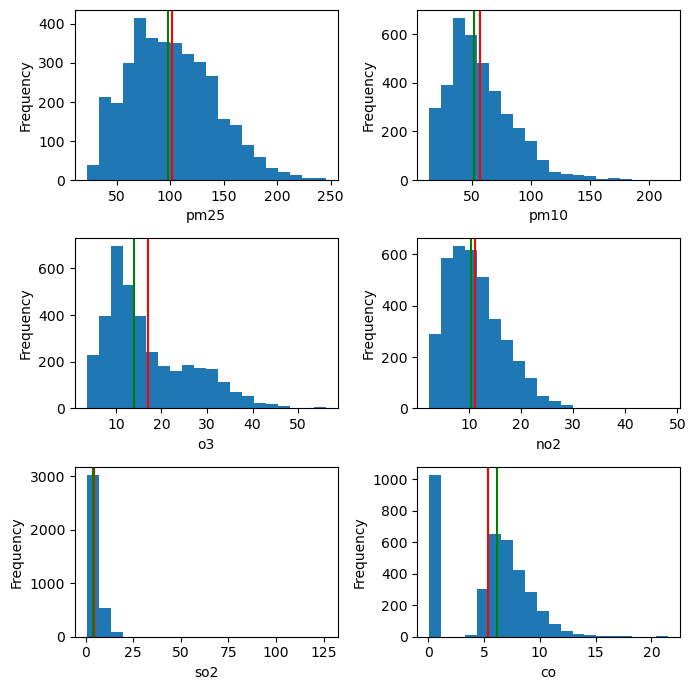

In [15]:
plt.figure()

plt.show()

plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col[i]].values, bins=20)  # check distribution of single set of data
    plt.axvline(df[col[i]].mean(),c='red',label='mean')
    plt.axvline(df[col[i]].median(),c='g',label='median')
    plt.xlabel(col[i])
    plt.ylabel('Frequency')
#     plt.title('PM2.5 histogram')

plt.tight_layout()
plt.show()

> **Finding**
PM2.5 shows normal distribution, mean and median also almost same.\
PM10, O3, NO2, SO2 show skewed right (the left tail (smaller values) is less than the right tail (larger values))

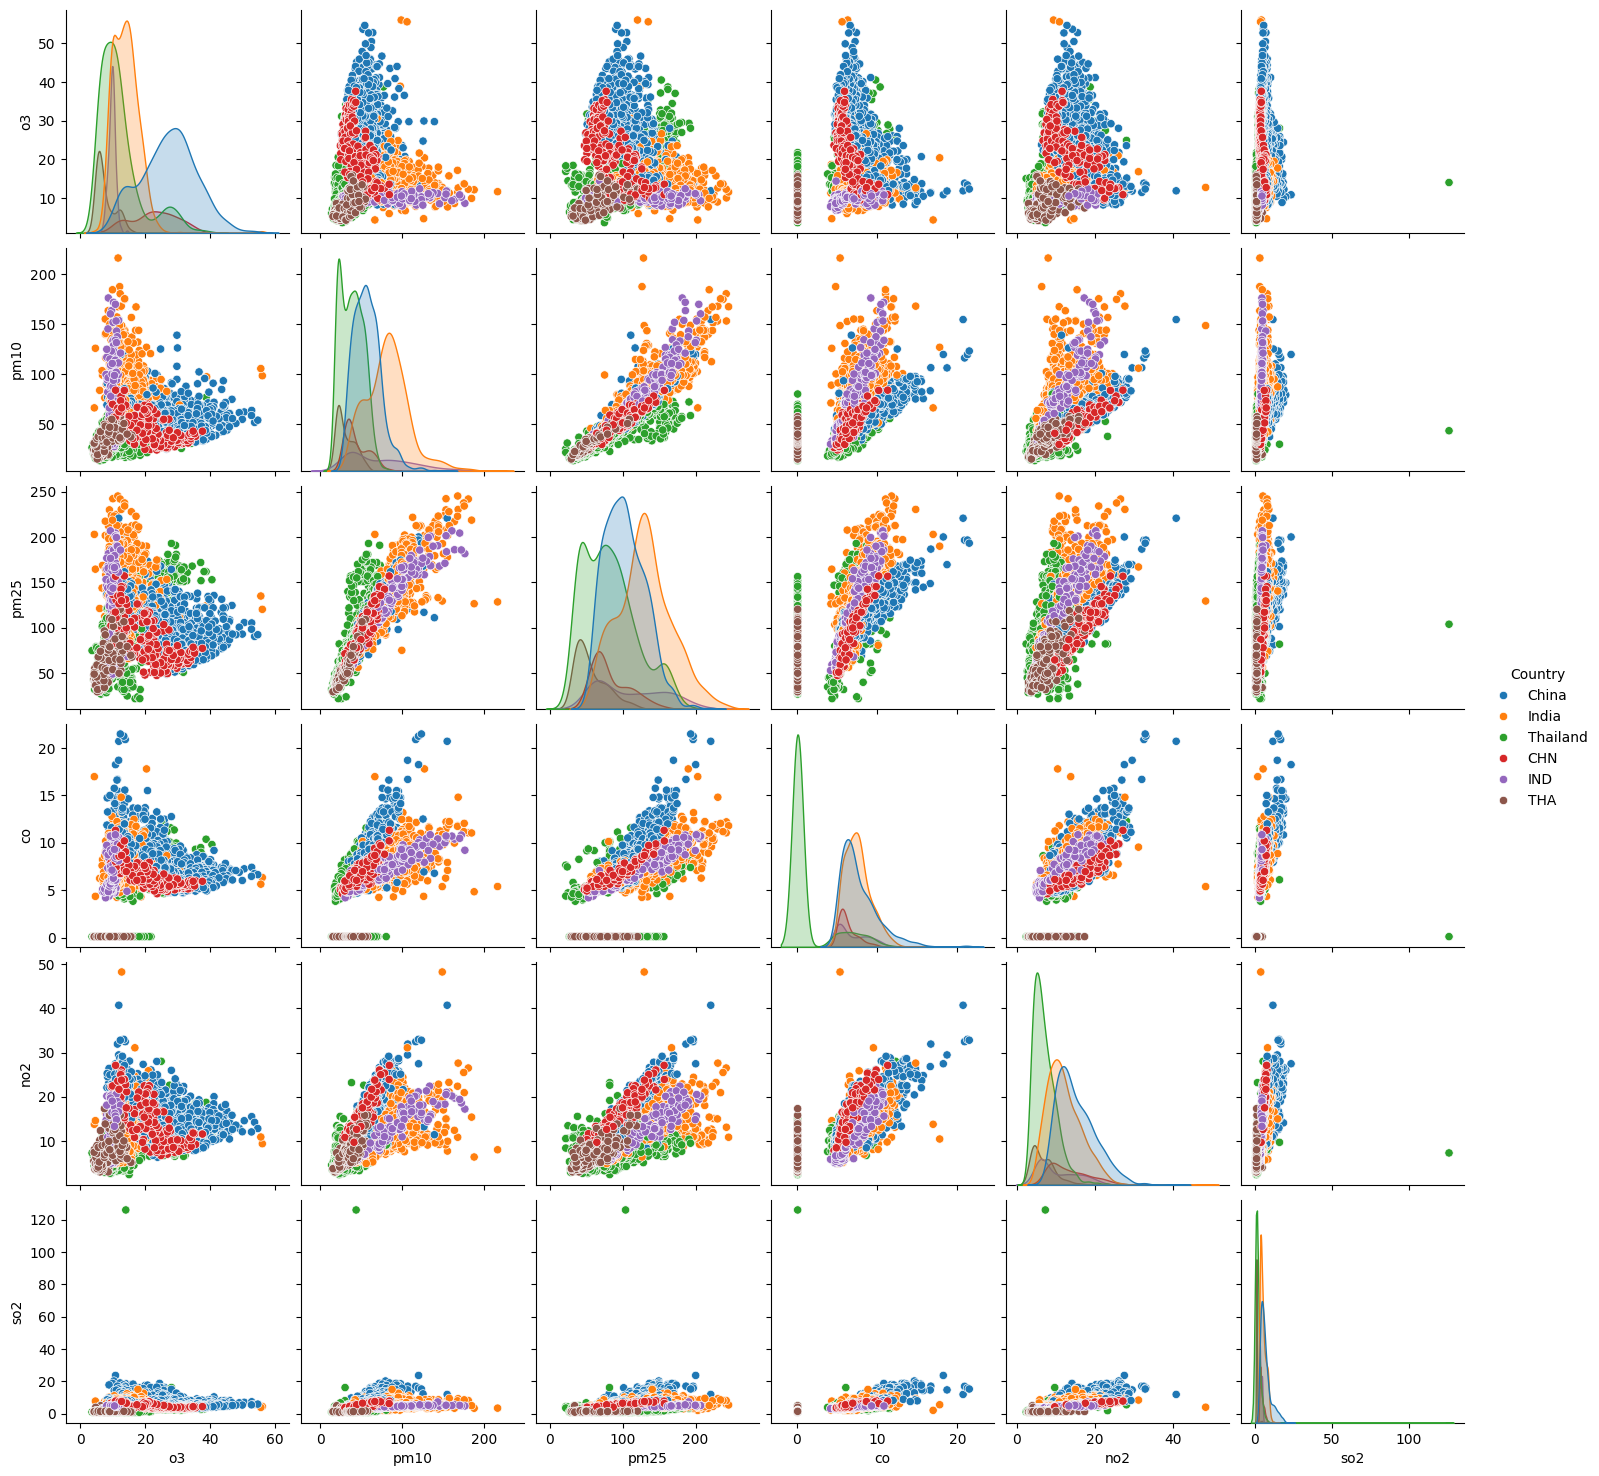

In [225]:
# Check correlations of each pollutants
cols_to_plot = ['Country','o3','pm10','pm25','co','no2','so2']
sns.pairplot(df[cols_to_plot], hue='Country')

> **Finding**
All polutants look like they have linear relationships

### View death data

In [16]:
df_d = pd.read_csv('Data/Merge 2016-2019.csv')

In [17]:
df_d.sample(10)

,Code,Cause,Country,iso3,year,Sex,Age Group,Population,Deaths,Death rate,DALY,DALY rate per 100 000 population
1151,230,African trypanosomiasis,India,IND,2016,BTSX,ALLAges,1320000000,0.00,0.00,0.00,0.00
3200,860,Alcohol use disorders,China,CHN,2017,BTSX,ALLAges,1430000000,19145.55,1.34,3241178.00,226.66
2741,920,Idiopathic intellectual disability,Thailand,THA,2016,BTSX,ALLAges,69000000,0.00,0.00,50962.48,73.86
2193,1000,Non-migraine headache,SriLanka,LKA,2016,BTSX,ALLAges,21000000,0.00,0.00,11270.02,53.67
1665,570,Vitamin A deficiency,Indonesia,IDN,2016,BTSX,ALLAges,262000000,0.00,0.00,48057.39,18.34
2048,1241,Gastritis and duodenitis,Indonesia,IDN,2019,BTSX,ALLAges,271000000,124.05,0.05,62164.98,22.94
2720,315,Yellow fever,Thailand,THA,2016,BTSX,ALLAges,69000000,0.00,0.00,0.00,0.00
224,850,Schizophrenia,Bangladesh,BGD,2017,BTSX,ALLAges,160000000,0.00,0.00,287696.80,179.81
2612,150,Measles,SriLanka,LKA,2019,BTSX,ALLAges,21300000,0.00,0.00,62.55,0.29
1929,315,Yellow fever,Indonesia,IDN,2018,BTSX,ALLAges,268000000,0.00,0.00,0.00,0.00


In [18]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Code                              3551 non-null   int64  
 1   Cause                             3551 non-null   object 
 2   Country                           3551 non-null   object 
 3   iso3                              3551 non-null   object 
 4   year                              3551 non-null   int64  
 5   Sex                               3551 non-null   object 
 6   Age Group                         3551 non-null   object 
 7   Population                        3551 non-null   int64  
 8   Deaths                            3551 non-null   float64
 9   Death rate                        3551 non-null   float64
 10  DALY                              3551 non-null   float64
 11  DALY rate per 100 000 population  3551 non-null   float64
dtypes: flo

In [19]:
df_d.head()

,Code,Cause,Country,iso3,year,Sex,Age Group,Population,Deaths,Death rate,DALY,DALY rate per 100 000 population
0,1140,Stroke,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,120674.90,76.38,2676519.0,1694.00
1,1130,Ischaemic heart disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,90632.07,57.36,2216751.0,1403.01
2,30,Tuberculosis,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,61224.00,38.75,2971096.0,1880.44
3,490,Neonatal conditions,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,52495.41,33.22,5453862.0,3451.81
4,1180,Chronic obstructive pulmonary disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,39330.24,24.89,1037541.0,656.67


In [20]:
# Narrow the data only focus countries
country = ["IND","THA","CHN"]
df_d = df_d[df_d['iso3'].isin(country)]

In [21]:
# Merge to main dataset

df_result = pd.merge( df_d[['Cause','Country','Deaths','Death rate','year','iso3']],df
                     , on=['iso3', 'year'], how='inner')

In [22]:
df_result.sample(10)

,Cause,Country_x,Deaths,Death rate,year,iso3,Date,Country_y,aqi,co,no2,o3,pm10,pm25,so2
111065,Chagas disease,India,0.00,0.00,2019,IND,2019-02-24,India,0.00,6.805556,14.705556,16.050000,80.000000,129.833333,7.433333
275006,Poisonings,China,26253.82,1.82,2018,CHN,2018-05-12,China,0.00,6.946154,14.421154,31.765306,59.461538,106.134615,5.188462
74809,Neonatal conditions,India,434148.30,31.69,2019,IND,2019-07-23,India,0.00,6.700000,8.385000,10.985000,46.764706,90.761905,4.035000
27136,Road injury,India,202927.30,15.14,2017,IND,2017-04-13,India,0.00,9.500000,13.692308,22.361538,88.666667,149.071429,5.561538
279524,Encephalitis,China,2778.08,0.19,2018,CHN,2018-03-16,China,47.75,6.836538,14.292308,28.102041,57.942308,98.288462,5.557692
9247,Pancreatitis,India,18726.82,1.42,2016,IND,2016-03-20,India,0.00,9.477778,8.088889,12.466667,96.600000,144.666667,4.444444
263917,Iodine deficiency,China,0.00,0.00,2017,CHN,2017-01-23,China,173.00,13.055769,22.534615,20.068000,79.115385,148.038462,16.063462
168232,Migraine,Thailand,0.00,0.00,2017,THA,2017-07-02,Thailand,0.00,0.100000,4.850000,5.300000,22.500000,42.333333,0.933333
30920,Oesophagus cancer,India,36447.69,2.72,2017,IND,2017-02-13,India,0.00,9.250000,17.100000,18.938462,85.777778,172.733333,6.350000
226883,Cataracts,Thailand,0.00,0.00,2019,THA,2019-06-23,Thailand,0.00,0.100000,4.783333,6.350000,28.333333,53.000000,1.016667


In [23]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339709 entries, 0 to 339708
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Cause       339709 non-null  object        
 1   Country_x   339709 non-null  object        
 2   Deaths      339709 non-null  float64       
 3   Death rate  339709 non-null  float64       
 4   year        339709 non-null  int64         
 5   iso3        339709 non-null  object        
 6   Date        339709 non-null  datetime64[ns]
 7   Country_y   339709 non-null  object        
 8   aqi         339709 non-null  float64       
 9   co          339709 non-null  float64       
 10  no2         339709 non-null  float64       
 11  o3          339709 non-null  float64       
 12  pm10        339709 non-null  float64       
 13  pm25        339709 non-null  float64       
 14  so2         339709 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(

In [24]:
#Check null value
df_result.isna().mean()*100

Cause         0.0
Country_x     0.0
Deaths        0.0
Death rate    0.0
year          0.0
iso3          0.0
Date          0.0
Country_y     0.0
aqi           0.0
co            0.0
no2           0.0
o3            0.0
pm10          0.0
pm25          0.0
so2           0.0
dtype: float64

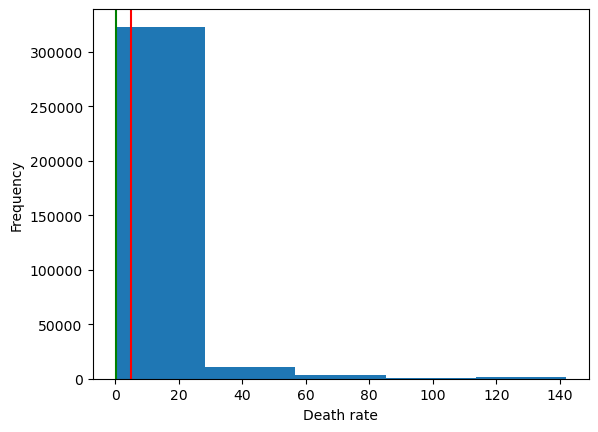

In [25]:
plt.hist(df_result['Death rate'].values, bins=5)  # check distribution of single set of data
plt.axvline(df_result['Death rate'].mean(),c='red',label='mean')
plt.axvline(df_result['Death rate'].median(),c='g',label='median')
plt.xlabel('Death rate')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

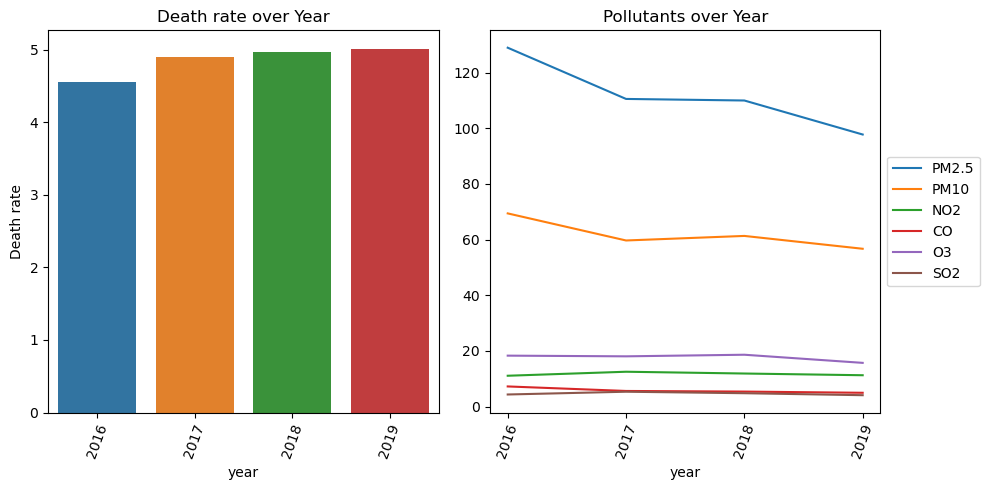

In [26]:
plt.figure()

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
g = df_result.groupby(['year'], as_index=False)['Death rate'].mean()
# .sort_values(by='asthmarate', ascending=False).head(10)
ax = sns.barplot(data=g, x='year', y='Death rate').set(title='Death rate over Year')
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
df_result.groupby(['year'])['pm25'].mean().plot(kind='line',label='PM2.5')
df_result.groupby(['year'])['pm10'].mean().plot(kind='line', label='PM10')
df_result.groupby(['year'])['no2'].mean().plot(kind='line', label='NO2')
df_result.groupby(['year'])['co'].mean().plot(kind='line', label='CO')
df_result.groupby(['year'])['o3'].mean().plot(kind='line', label='O3')
df_result.groupby(['year'])['so2'].mean().plot(kind='line', label='SO2')
df_result.groupby(['year'], as_index=False)['Death rate'].mean()
plt.legend(loc="upper right")
plt.title('Pollutants over Year')
plt.locator_params(axis="both", integer=True, tight=True)
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

>**Finding**

1. The top two highest pollutants are PM2.5 and PM10, while other pollutants appear to be low.
2. The trend shows a decline from 2016 to 2019, but the death rate is increasing. This suggests that the impact of pollutants might have a delayed effect or that pollutants are only one of the factors contributing to the death rate.

Therefore, the project will focus on assessing the level of impact on health.

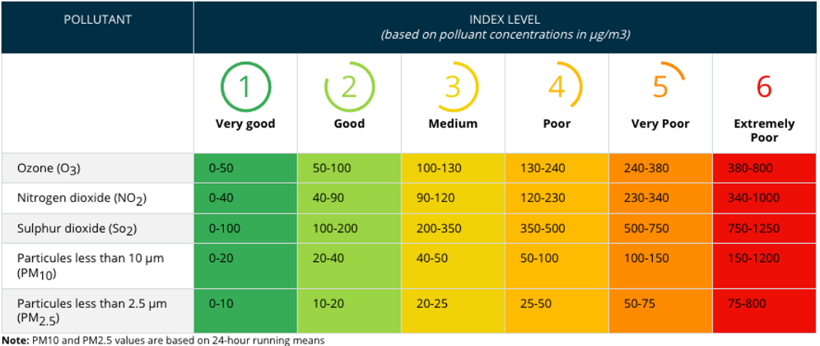

From above level will focus level 5, and 6.\
Unheathy value of PM2.5 > 50.\
Unheathy value of PM10 > 100.\
Unheathy value of NO2 > 230.\
Unheathy value of O3 > 240.\
Unheathy value of SO2 > 500.

Then, change to value of each pollutant (0 means healthy, 1 means unhealthy)

In [27]:
df_result['PM25_Poor'] = np.where(df_result['pm25'] > 50, 1, 0)
df_result['PM10_Poor'] = np.where(df_result['pm10'] > 100, 1, 0)
df_result['NO2_Poor'] = np.where(df_result['no2'] > 230, 1, 0)
df_result['SO2_Poor'] = np.where(df_result['so2'] > 500, 1, 0)
df_result['O3_Poor'] = np.where(df_result['o3'] > 240, 1, 0)
df_result['Unhealthy'] = np.where(df_result['PM25_Poor'] | df_result['PM10_Poor'] |
                                  df_result['NO2_Poor'] | df_result['SO2_Poor'] | df_result['O3_Poor'] ,1,0)
df_result.sample(10)

,Cause,Country_x,Deaths,Death rate,year,iso3,Date,Country_y,aqi,co,...,o3,pm10,pm25,so2,PM25_Poor,PM10_Poor,NO2_Poor,SO2_Poor,O3_Poor,Unhealthy
33447,Ovary cancer,India,20042.32,1.50,2017,IND,2017-01-09,India,0.0,9.507143,...,13.653846,81.444444,162.266667,4.750000,1,0,0,0,0,1
11558,Acute hepatitis B,India,8016.11,0.61,2016,IND,2016-04-08,India,0.0,8.422222,...,13.100000,83.800000,118.636364,4.077778,1,0,0,0,0,1
45863,Eating disorders,India,14.64,0.00,2017,IND,2017-06-13,India,0.0,7.416667,...,11.866667,54.428571,114.000000,3.725000,1,0,0,0,0,1
184915,Gonorrhoea,Thailand,10.07,0.01,2018,THA,2018-01-30,Thailand,0.0,0.100000,...,6.950000,29.833333,66.000000,1.266667,1,0,0,0,0,1
232232,Schistosomiasis,Thailand,0.00,0.00,2019,THA,2019-08-25,Thailand,0.0,0.100000,...,5.633333,18.500000,31.166667,1.283333,0,0,0,0,0,0
189560,Eating disorders,Thailand,1.62,0.00,2018,THA,2018-04-10,Thailand,0.0,0.100000,...,19.750000,57.000000,121.500000,1.533333,1,0,0,0,0,1
41709,Diphtheria,India,87.09,0.01,2017,IND,2017-02-05,India,0.0,9.735714,...,18.476923,84.888889,165.666667,6.485714,1,0,0,0,0,1
221078,Syphilis,Thailand,36.18,0.05,2019,THA,2019-01-28,Thailand,0.0,0.100000,...,11.083333,60.166667,136.333333,1.450000,1,0,0,0,0,1
302624,Bladder cancer,China,37873.26,2.63,2019,CHN,2019-05-18,China,0.0,5.588462,...,30.606522,44.076923,81.807692,3.726923,1,0,0,0,0,1
170541,Road injury,Thailand,22458.32,32.36,2018,THA,2018-04-23,Thailand,0.0,0.100000,...,12.050000,43.500000,95.666667,0.983333,1,0,0,0,0,1


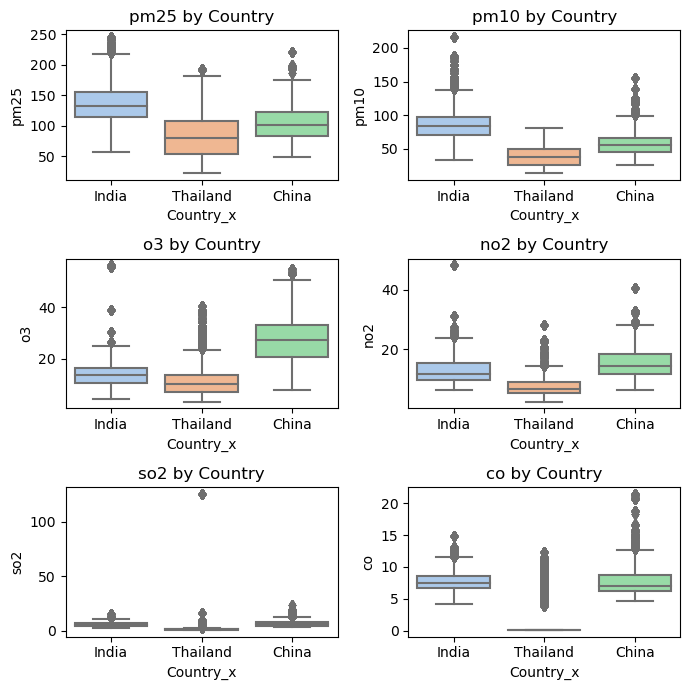

In [28]:
plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)

    sns.boxplot(x='Country_x',
                y=col[i],
                data=df_result,
                palette="pastel").set(title= col[i]+' by Country')

plt.tight_layout()
plt.show()


> **Observation**
There are many outliers showing in every polutants mean some part of those countried have different air quality.

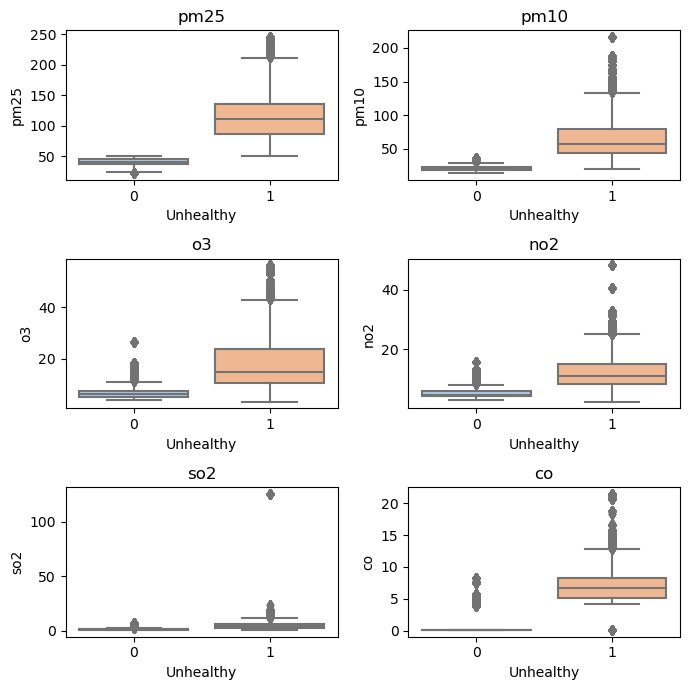

In [29]:
plt.subplots(3, 2 , figsize=(7,7))
col = ['pm25','pm10','o3','no2','so2','co']
for i in range(len(col)):
    plt.subplot(3, 2, i+1)

    sns.boxplot(x='Unhealthy',
                y=col[i],
                data=df_result,
                palette="pastel").set(title= col[i])

plt.tight_layout()
plt.show()

**Observation**

Boxplot shows many outliners in each pollutants.

---
## Step 2. Modelling
1. Linear Regression
2. Logistic Regression
3. KNN
4. Decision tree

> From this step using **Google Colab** to run (purpose for XGBoost using GPU)

In [30]:
# review data
df_result

,Cause,Country_x,Deaths,Death rate,year,iso3,Date,Country_y,aqi,co,...,o3,pm10,pm25,so2,PM25_Poor,PM10_Poor,NO2_Poor,SO2_Poor,O3_Poor,Unhealthy
0,Ischaemic heart disease,India,1405038.0,106.44,2016,IND,2016-01-01,India,0.00,4.350000,...,4.625000,126.000000,164.666667,7.750000,1,1,0,0,0,1
1,Ischaemic heart disease,India,1405038.0,106.44,2016,IND,2016-01-02,India,0.00,7.925000,...,8.866667,155.000000,178.000000,8.750000,1,1,0,0,0,1
2,Ischaemic heart disease,India,1405038.0,106.44,2016,IND,2016-01-03,India,0.00,7.985714,...,13.666667,144.000000,209.777778,2.914286,1,1,0,0,0,1
3,Ischaemic heart disease,India,1405038.0,106.44,2016,IND,2016-01-04,India,0.00,10.244444,...,11.066667,153.600000,225.000000,5.733333,1,1,0,0,0,1
4,Ischaemic heart disease,India,1405038.0,106.44,2016,IND,2016-01-05,India,0.00,11.466667,...,8.944444,153.200000,230.000000,6.000000,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339704,Trichomoniasis,China,0.0,0.00,2019,CHN,2019-12-27,China,79.00,9.411538,...,13.667391,60.923077,120.211539,6.790385,1,0,0,0,0,1
339705,Trichomoniasis,China,0.0,0.00,2019,CHN,2019-12-28,China,155.50,10.651923,...,14.602174,70.750000,141.807692,7.992308,1,0,0,0,0,1
339706,Trichomoniasis,China,0.0,0.00,2019,CHN,2019-12-29,China,177.75,10.217308,...,13.343478,69.980769,141.115385,7.061538,1,0,0,0,0,1
339707,Trichomoniasis,China,0.0,0.00,2019,CHN,2019-12-30,China,59.75,8.355769,...,12.545652,58.596154,118.269231,5.625000,1,0,0,0,0,1


In [31]:
# Drop non-numeric columns
X = df_result.drop(['iso3', 'Cause','Country_x','Country_y','Date'],axis=1)
y = df_result['Death rate'].copy()

In [32]:
X

,Deaths,Death rate,year,aqi,co,no2,o3,pm10,pm25,so2,PM25_Poor,PM10_Poor,NO2_Poor,SO2_Poor,O3_Poor,Unhealthy
0,1405038.0,106.44,2016,0.00,4.350000,14.600000,4.625000,126.000000,164.666667,7.750000,1,1,0,0,0,1
1,1405038.0,106.44,2016,0.00,7.925000,7.725000,8.866667,155.000000,178.000000,8.750000,1,1,0,0,0,1
2,1405038.0,106.44,2016,0.00,7.985714,11.442857,13.666667,144.000000,209.777778,2.914286,1,1,0,0,0,1
3,1405038.0,106.44,2016,0.00,10.244444,15.077778,11.066667,153.600000,225.000000,5.733333,1,1,0,0,0,1
4,1405038.0,106.44,2016,0.00,11.466667,15.000000,8.944444,153.200000,230.000000,6.000000,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339704,0.0,0.00,2019,79.00,9.411538,19.921154,13.667391,60.923077,120.211539,6.790385,1,0,0,0,0,1
339705,0.0,0.00,2019,155.50,10.651923,24.498077,14.602174,70.750000,141.807692,7.992308,1,0,0,0,0,1
339706,0.0,0.00,2019,177.75,10.217308,24.100000,13.343478,69.980769,141.115385,7.061538,1,0,0,0,0,1
339707,0.0,0.00,2019,59.75,8.355769,18.388462,12.545652,58.596154,118.269231,5.625000,1,0,0,0,0,1


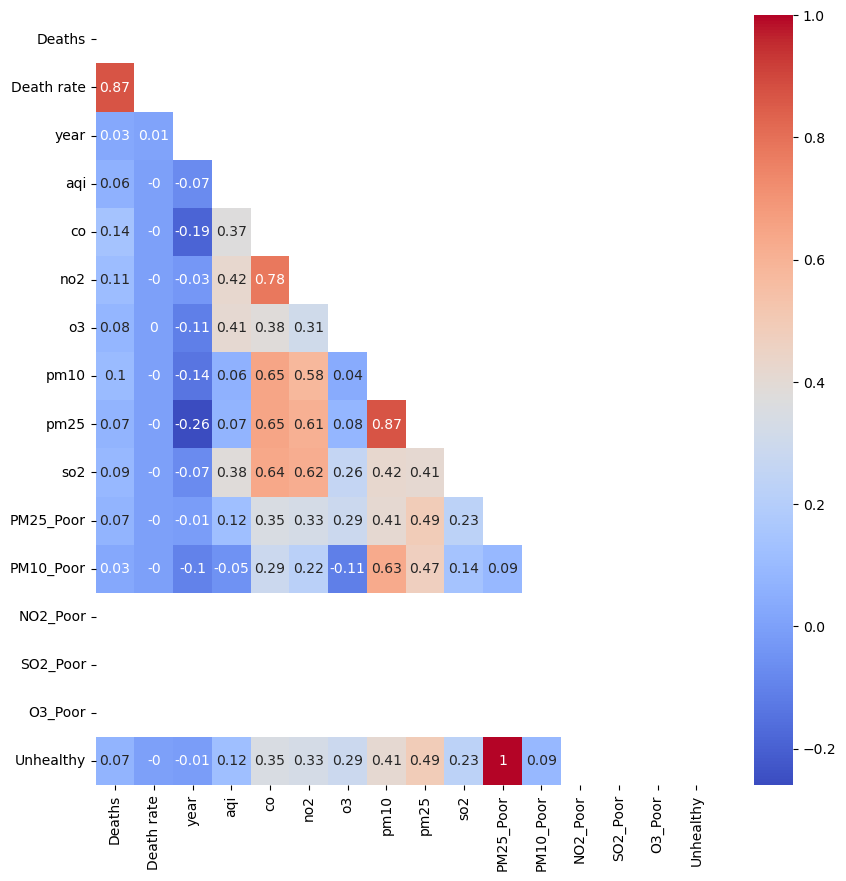

In [33]:
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(10,10))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

> **Finding**
From the heatmap and results, only numeric columns
Correlations between PM10, PM2.5, CO and NO2 are strong positive.

In [34]:
df_result_m = pd.get_dummies(df_result,columns=['Country_x'], dtype=int)
df_result_m

,Cause,Deaths,Death rate,year,iso3,Date,Country_y,aqi,co,no2,...,so2,PM25_Poor,PM10_Poor,NO2_Poor,SO2_Poor,O3_Poor,Unhealthy,Country_x_China,Country_x_India,Country_x_Thailand
0,Ischaemic heart disease,1405038.0,106.44,2016,IND,2016-01-01,India,0.00,4.350000,14.600000,...,7.750000,1,1,0,0,0,1,0,1,0
1,Ischaemic heart disease,1405038.0,106.44,2016,IND,2016-01-02,India,0.00,7.925000,7.725000,...,8.750000,1,1,0,0,0,1,0,1,0
2,Ischaemic heart disease,1405038.0,106.44,2016,IND,2016-01-03,India,0.00,7.985714,11.442857,...,2.914286,1,1,0,0,0,1,0,1,0
3,Ischaemic heart disease,1405038.0,106.44,2016,IND,2016-01-04,India,0.00,10.244444,15.077778,...,5.733333,1,1,0,0,0,1,0,1,0
4,Ischaemic heart disease,1405038.0,106.44,2016,IND,2016-01-05,India,0.00,11.466667,15.000000,...,6.000000,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339704,Trichomoniasis,0.0,0.00,2019,CHN,2019-12-27,China,79.00,9.411538,19.921154,...,6.790385,1,0,0,0,0,1,1,0,0
339705,Trichomoniasis,0.0,0.00,2019,CHN,2019-12-28,China,155.50,10.651923,24.498077,...,7.992308,1,0,0,0,0,1,1,0,0
339706,Trichomoniasis,0.0,0.00,2019,CHN,2019-12-29,China,177.75,10.217308,24.100000,...,7.061538,1,0,0,0,0,1,1,0,0
339707,Trichomoniasis,0.0,0.00,2019,CHN,2019-12-30,China,59.75,8.355769,18.388462,...,5.625000,1,0,0,0,0,1,1,0,0


In [35]:
df_result_m = df_result.drop(['iso3', 'Cause','Country_x','Country_y','Date'],axis=1)

In [36]:
df_result_m.sample(10)

,Deaths,Death rate,year,aqi,co,no2,o3,pm10,pm25,so2,PM25_Poor,PM10_Poor,NO2_Poor,SO2_Poor,O3_Poor,Unhealthy
133551,109.93,0.16,2016,0.000000,4.833333,11.316667,11.860000,25.666667,46.000000,3.760000,0,0,0,0,0,0
125443,3741.45,5.42,2016,0.000000,9.240000,14.500000,17.480000,60.200000,168.000000,4.040000,1,0,0,0,0,1
6797,32689.96,2.48,2016,0.000000,6.311111,9.622222,17.900000,97.000000,127.727273,3.311111,1,0,0,0,0,1
114902,0.00,0.00,2019,0.000000,6.290000,7.320000,8.665000,40.000000,71.428571,3.860000,1,0,0,0,0,1
330251,0.00,0.00,2019,28.000000,5.132692,8.026923,26.545652,25.442308,49.096154,3.167308,0,0,0,0,0,0
180880,171.93,0.25,2018,0.000000,0.100000,11.660000,11.940000,61.880000,131.600000,1.660000,1,0,0,0,0,1
180418,232.74,0.34,2018,0.000000,0.100000,6.200000,12.183333,30.783333,74.500000,1.050000,1,0,0,0,0,1
258721,417.48,0.03,2017,78.666667,6.796154,13.457692,37.331915,55.269231,90.500000,6.317308,1,0,0,0,0,1
114216,17.17,0.00,2019,0.000000,8.138889,14.555556,15.966667,80.461538,116.166667,7.133333,1,0,0,0,0,1
99750,2595.02,0.19,2019,0.000000,8.544444,18.183333,11.200000,105.769231,155.210526,8.172222,1,1,0,0,0,1


## Linear regression

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [248]:
X = df_result_m[['co','no2','o3','pm10','pm25','so2']]
y = df_result_m['Unhealthy']

In [249]:
X

,co,no2,o3,pm10,pm25,so2
0,4.350000,14.600000,4.625000,126.000000,164.666667,7.750000
1,7.925000,7.725000,8.866667,155.000000,178.000000,8.750000
2,7.985714,11.442857,13.666667,144.000000,209.777778,2.914286
3,10.244444,15.077778,11.066667,153.600000,225.000000,5.733333
4,11.466667,15.000000,8.944444,153.200000,230.000000,6.000000
...,...,...,...,...,...,...
339704,9.411538,19.921154,13.667391,60.923077,120.211539,6.790385
339705,10.651923,24.498077,14.602174,70.750000,141.807692,7.992308
339706,10.217308,24.100000,13.343478,69.980769,141.115385,7.061538
339707,8.355769,18.388462,12.545652,58.596154,118.269231,5.625000


In [250]:
df_result_m.groupby(df_result_m['Unhealthy'])['Unhealthy'].count()

Unhealthy
0     26593
1    313116
Name: Unhealthy, dtype: int64

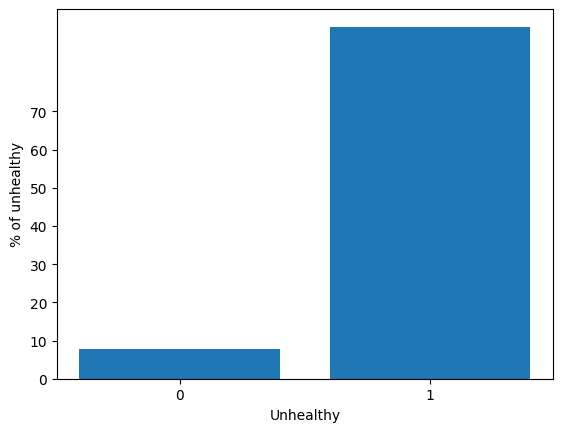

Class imbalance: [0.08 0.92]


In [251]:
values, counts = np.unique(df_result_m['Unhealthy'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Unhealthy')
plt.ylabel('% of unhealthy')
plt.yticks(np.arange(0, 80, step=10))

plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

> **Finding** Most of result are unhealthy from the selected country!

In [252]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [253]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train, y_train)
# credit_logit.fit(X_train, y_train);
#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: 0.4293361380601651
Coefficients: -0.0072727622235422285


In [254]:
# Step 3 prediction
model_prediction = linear_regression_model.predict(X_test)

In [255]:
# Evaluate the model
print(f'The R2 score: {r2_score(y_test, model_prediction)}')

The R2 score: 0.31918582745115187


In [256]:
# 3. Score model
print(f'Score on train: {linear_regression_model.score(X_train, y_train)}')
print(f'Score on test: {linear_regression_model.score(X_test, y_test)}')

Score on train: 0.31330181486027897
Score on test: 0.31918582745115187


>**Finding**  R^2 score is 0.31 consider low and score on train and test also low.

### Logistic Regression

For the rest of models will add some noise and using Standard Scaler.

In [257]:
# Add some noise to the data to make it harder to classify
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 10)

# Train-Test-Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
# 1. Instantiate the model
logit_regression_model = LogisticRegression()

# 2. Fit the model
logit_regression_model.fit(X_train, y_train)
# logit_regression_model.fit(X, y)


LogisticRegression()

In [259]:
X

,co,no2,o3,pm10,pm25,so2
0,17.665865,21.752790,-10.829003,125.916162,170.880026,0.549144
1,10.580116,8.810485,8.909581,153.253998,182.330262,20.780374
2,-1.664942,21.725598,15.952968,148.451376,198.411756,4.265654
3,25.089814,4.279729,-8.710616,136.166277,227.660702,29.583007
4,22.703579,31.726222,9.935937,167.179964,227.287520,12.132042
...,...,...,...,...,...,...
339704,4.304018,13.123428,25.991489,62.011784,111.830756,22.421232
339705,12.143972,47.682202,11.059280,48.246802,147.410791,2.078286
339706,11.392125,49.529976,11.048615,70.160039,149.131576,-0.431174
339707,9.165370,26.486888,16.901841,60.960000,116.856433,11.724297


In [260]:
# Step 3 prediction
model_prediction = logit_regression_model.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, model_prediction)
print(f'The R2 score: {r2}')

train_pred = logit_regression_model.predict(X_train)
r2_train = r2_score(y_train , train_pred)
print(f'The R2 score: {r2_train}')

The R2 score: 0.6156303908512997
The R2 score: 0.6133735448508808


In [261]:
# 3. Score model
print(f'Score on train: {logit_regression_model.score(X_train, y_train)}')
print(f'Score on test: {logit_regression_model.score(X_test, y_test)}')

Score on train: 0.972169422530236
Score on test: 0.9721134693316849


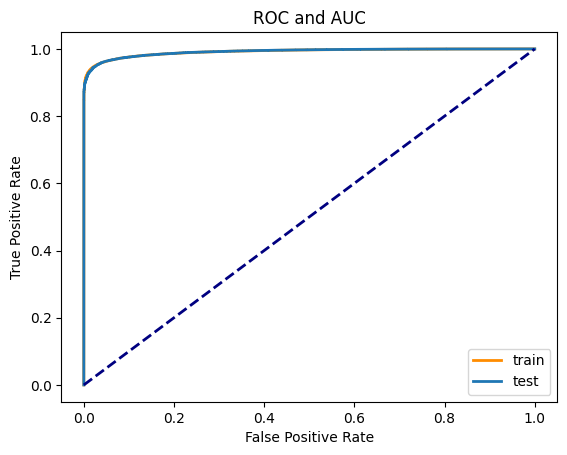

Test AUC score: 0.9914707844854485
Train AUC score: 0.9914433717994089


In [262]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
y_proba = logit_regression_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = logit_regression_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

> **Finding** AUC of train and test set are around 97% which is very high (good), let's check the confusion metrix.

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, model_prediction)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Positive review", "Predicted Negative review"],
    index=["True Positive review", "True Negtive review"]
)

display(cf_df)


,Predicted Positive review,Predicted Negative review
True Positive review,6442,1584
True Negtive review,1258,92629


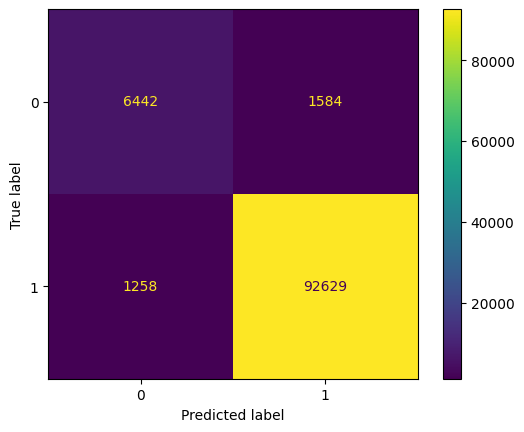

In [264]:
ConfusionMatrixDisplay.from_estimator(logit_regression_model, X_test, y_test)

> **Finding**  True positive and True negative are high align with the AUC score.


In [265]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Get class predictions
y_pred = logit_regression_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [266]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8026
           1       0.98      0.99      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.91      0.89      0.90    101913
weighted avg       0.97      0.97      0.97    101913



In [267]:

# Calculation of Mean Squared Error (MSE) , RMSE, MAE  -- 0 is perfect fit
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
mae =  mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
test_accuracy = accuracy_score(y_pred, y_test)
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))

MSE test :  0.027886530668315132
RMSE test :  0.16699260662770413
MAE test :  [0.02788653]


In [268]:
data = {'Model': ['Logistic Regression'],
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse,
        'Accuracy' : test_accuracy}
model_df =  pd.DataFrame(data)
model_df

,Model,R2,MAE,MSE,RMSE,Accuracy
0,Logistic Regression,0.61563,0.027887,0.027887,0.166993,0.972113


## Principal Component Analysis

Checking distribution data and try to transform

In [269]:
from sklearn.decomposition import PCA
# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [270]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (237796, 6)
PCA Transformed: (237796, 5)


In [271]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression()

# Fitting to original data
my_logreg.fit(X_train,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train, y_train)}')
print(f'Test Score: {my_logreg.score(X_test, y_test)}')


Train Score: 0.972169422530236
Test Score: 0.9721134693316849


In [272]:

my_logreg_PCA = LogisticRegression()

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score - PCA: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score - PCA: {my_logreg_PCA.score(X_test_PCA, y_test)}')

# Score are almost same even reduce PCs from 6 to 5

Train Score - PCA: 0.9668791737455634
Test Score - PCA: 0.9677077507285626


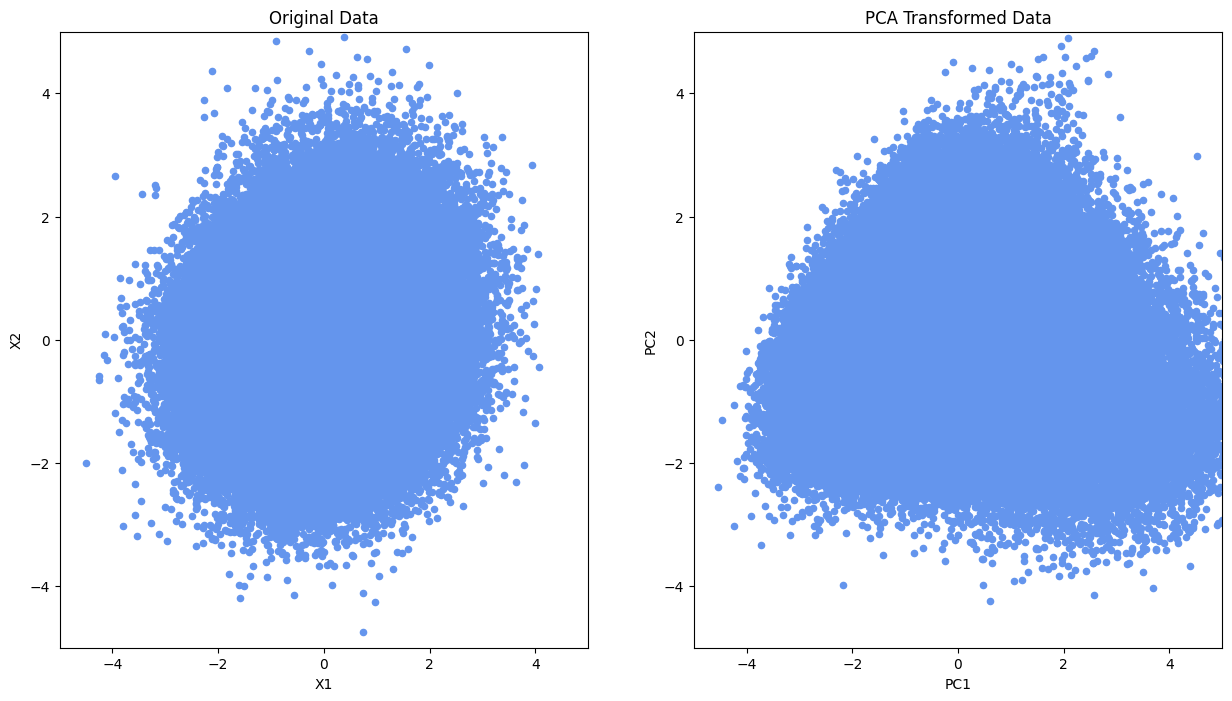

In [273]:
plt.subplots(1,2,figsize=(15,8))

plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='cornflowerblue', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(1,2,2)
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c='cornflowerblue', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.show()


> **Finding**
> The dataset is less features, only 6, after transform PCA reduce to 5 and the shape is not much changed. So, let's keep the original dataset for modelling.

>**Summary Logistic regression**
>- An R^2 value of 0.61 indicates a quite high correlation.
>- The mean absolute error (MAE) of 0.02, which is close to 0, means the error is low. Both the mean square error (MSE) and the root mean square error (RMSE) are also low.
>- The accuracy is very high at 97%.

## K-Nearest Neighbors (KNN)

In [274]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [275]:
# Fit the model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train);
# Score the model on the test set
test_predictions = KNN_model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print(f"Test set accuracy: {test_accuracy}")
print('\nThe number of neighbors used to predict the target : ',KNN_model.n_neighbors)

Test set accuracy: 0.9677175630194381

The number of neighbors used to predict the target :  5


In [276]:
# Get class predictions
y_pred = KNN_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      8026
           1       0.98      0.98      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.89      0.88      0.89    101913
weighted avg       0.97      0.97      0.97    101913



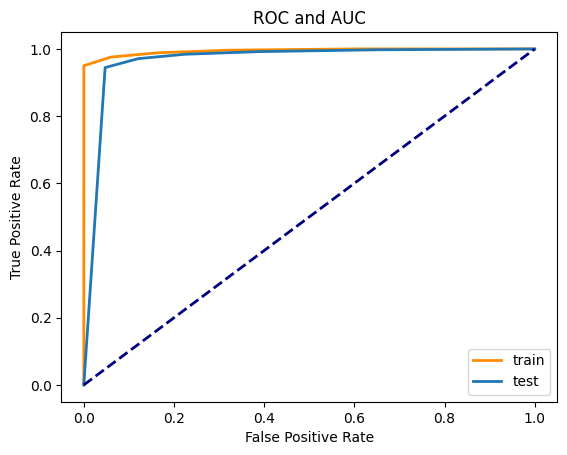

Test AUC score: 0.9658555248341588
Train AUC score: 0.9941734392809669


In [277]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = KNN_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = KNN_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

> **Finding** AUC test set is 96% means good score, correct prediction is very high

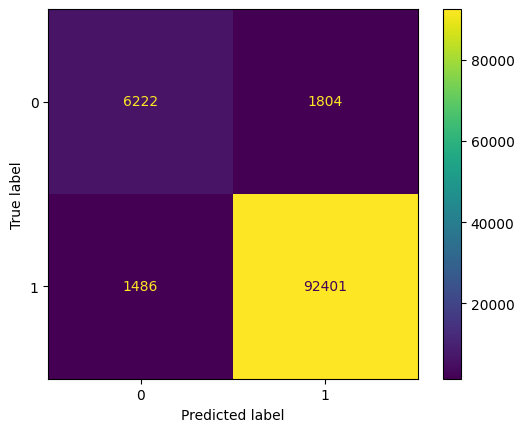

In [278]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

> **Finding** Confusion Metrix shows high True Positive and False Positive align to accuracy.

## Tuning KNN model

In [279]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [280]:
gridsearch.best_params_

{'n_neighbors': 9}

In [281]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse =  mean_squared_error(y_train,train_preds_grid, squared=False)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = mean_squared_error(y_test,test_preds_grid, squared=False)

print('train_rmse :', train_rmse)
print('test_rmse :', test_rmse)


train_rmse : 0.13503568346479022
test_rmse : 0.15032372177676817


In [282]:


# Calculation of Mean Squared Error (MSE) , RMSE, MAE  -- 0 is perfect fit
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))

MSE test :  0.03228243698056185
RMSE test :  0.17967313928509696
MAE test :  [0.03228244]


In [283]:
r2 = r2_score(y_test, test_preds_grid)
mae =  mean_absolute_error(y_test,test_preds_grid,  multioutput='raw_values')
test_accuracy = accuracy_score(test_preds_grid.round(),y_test)
data = {'Model': 'KNN',
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : test_mse,
        'RMSE' : test_rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)
model_df

,Model,R2,MAE,MSE,RMSE,Accuracy
0,Logistic Regression,0.615630,0.027887,0.027887,0.166993,0.972113
1,KNN,0.688535,[0.04396015337700893],0.022597,0.150324,0.969189


## Decision Tree

In [284]:
from sklearn.tree import DecisionTreeClassifier

In [285]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X_train, y_train)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

DT training set accuracy: 0.9713031337785328
The TEST classification accuracy is:  0.97051406591897


In [286]:
# Get class predictions
y_pred = DT_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

report_initial = classification_report(y_test, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8026
           1       0.99      0.98      0.98     93887

    accuracy                           0.97    101913
   macro avg       0.89      0.92      0.90    101913
weighted avg       0.97      0.97      0.97    101913



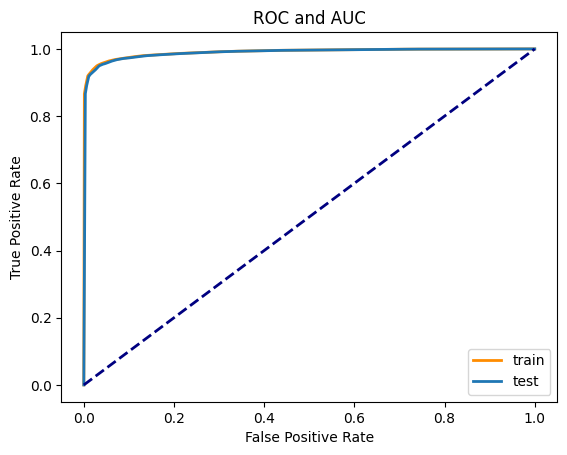

Test AUC score: 0.988568821051565
Train AUC score: 0.9901041273199599


In [287]:
y_proba = DT_model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = DT_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

In [288]:
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = mean_squared_error(y_test,y_pred, squared=False)
# mae =  mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
print('R2 test : ',r2_score(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test,y_pred) )
print('RMSE test : ', mean_squared_error(y_test,y_pred, squared=False) )
print('MAE test : ', mean_absolute_error(y_test,y_pred,  multioutput='raw_values'))



R2 test :  0.5935852654849245
MSE test :  0.029485934081029896
RMSE test :  0.17171468801774034
MAE test :  [0.02948593]


In [289]:
DT_model.max_depth

5

### Tunning Decision tree
Find best parameters

In [290]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV


tree_para = {'criterion':['gini','entropy'],'max_depth': [6,7,8,9,10]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10]})

In [291]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [292]:
train_preds_grid = grid_tree.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse =  mean_squared_error(y_train,train_preds_grid, squared=False)
test_preds_grid = grid_tree.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = mean_squared_error(y_test,test_preds_grid, squared=False)

print('train_rmse :', train_rmse)
print('test_rmse :', test_rmse)


train_rmse : 0.16405433641215203
test_rmse : 0.1704241209208078


In [293]:
r2 = r2_score(y_test, test_preds_grid)
mae =  mean_absolute_error(y_test,test_preds_grid,  multioutput='raw_values')
test_accuracy = accuracy_score(test_preds_grid.round(),y_test)
data = {'Model': 'Decision Tree' ,
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : test_mse,
        'RMSE' : test_rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)

model_df

,Model,R2,MAE,MSE,RMSE,Accuracy
0,Logistic Regression,0.615630,0.027887,0.027887,0.166993,0.972113
1,KNN,0.688535,[0.04396015337700893],0.022597,0.150324,0.969189
2,Decision Tree,0.599671,[0.029044380991630116],0.029044,0.170424,0.970956


In [294]:
import xgboost as xgb



In [295]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred,  multioutput='raw_values')
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
print('R2 test : ',r2)
print('MSE test : ', mae )
print('RMSE test : ', rmse )
print('MAE test : ', mae)


R2 test :  0.7165992061527791
MSE test :  [0.03889164]
RMSE test :  0.14339144917567861
MAE test :  [0.03889164]


In [296]:
test_accuracy = accuracy_score(y_pred.round(),y_test)
data = {'Model': 'XGBoost' ,
        'R2' : r2 ,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse,
        'Accuracy' : test_accuracy}
model_df = model_df._append(data, ignore_index = True)

model_df

,Model,R2,MAE,MSE,RMSE,Accuracy
0,Logistic Regression,0.615630,0.027887,0.027887,0.166993,0.972113
1,KNN,0.688535,[0.04396015337700893],0.022597,0.150324,0.969189
2,Decision Tree,0.599671,[0.029044380991630116],0.029044,0.170424,0.970956
3,XGBoost,0.716599,[0.03889163992459305],0.020561,0.143391,0.970691


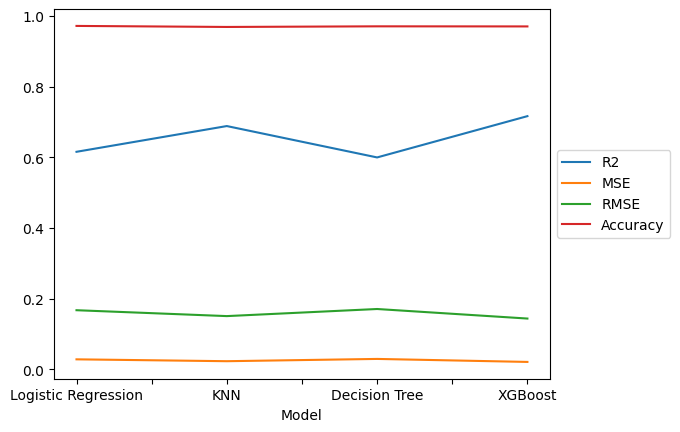

In [297]:
model_df.plot(kind='line',x='Model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---
## Conclusion:

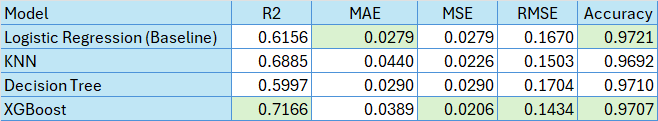

🏅Selected Model is XGBoost:
Reasons:
- A good score of R2 should be close to 1
- MAE and MSE should close to 0
- RMSE, the lower is better
- The above table shows that each model’s results are almost the same but the **XGBoost** is the best from those 3 models.!


## Key Takeaway from the project

- Since the impact of the air quality index (AQI) on mortality takes time to become evident, it's crucial to forecast AQI based on each pollutant. Add more datasets that contain many pollutants (O3, PM2.5, PM10, CO2, NO2, CO, SO2) or add more countries. Issue of this version some countries did not provide all pollutants.
- Find a relationship between asthma and pollutant density and improve the model to predict diseases or mortality. 
- Develop an application to predict the unhealthy indicator.
